<a href="https://colab.research.google.com/github/kelvinwasike007/container/blob/master/NUFTY_SARIMA_MODEL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*Importing the nifty dataset*

In [ ]:
from google.colab import files

# Upload a file and store it in the variable 'uploaded'
uploaded = files.upload()

# Get the file path
file_path = list(uploaded.keys())[0]
print("File path:", file_path)

#make sure the file is renamed accordingly
import shutil

shutil.copyfile(file_path, 'nufty_data.csv')

Saving NIFTY 50.csv to NIFTY 50 (1).csv
File path: NIFTY 50 (1).csv


'nufty_data.csv'

**Import libraries**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
color = sns.color_palette()
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

import plotly.offline as py
from plotly import tools
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.express as px

from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.sarimax import SARIMAX

*Reading the data into the notebook environment*

In [ ]:
nifty_50_df = pd.read_csv("nufty_data.csv", index_col='Date', parse_dates=['Date'])
nifty_bank_df = pd.read_csv("nufty_data.csv", index_col='Date', parse_dates=['Date'])

nifty_50_df.head(5)

,Open,High,Low,Close,Volume,Turnover,P/E,P/B,Div Yield
Date,,,,,,,,,
2000-01-03,1482.15,1592.90,1482.15,1592.2,25358322,8.841500e+09,25.91,4.63,0.95
2000-01-04,1594.40,1641.95,1594.40,1638.7,38787872,1.973690e+10,26.67,4.76,0.92
2000-01-05,1634.55,1635.50,1555.05,1595.8,62153431,3.084790e+10,25.97,4.64,0.95
2000-01-06,1595.80,1639.00,1595.80,1617.6,51272875,2.531180e+10,26.32,4.70,0.94
2000-01-07,1616.60,1628.25,1597.20,1613.3,54315945,1.914630e+10,26.25,4.69,0.94


*Display the last 5 records*


In [ ]:
nifty_50_df.tail(5)

,Open,High,Low,Close,Volume,Turnover,P/E,P/B,Div Yield
Date,,,,,,,,,
2021-07-01,15755.05,15755.55,15667.05,15680.00,224921644,1.735997e+11,28.26,4.23,1.27
2021-07-02,15705.85,15738.35,15635.95,15722.20,254808999,1.801542e+11,28.33,4.24,1.23
2021-07-05,15793.40,15845.95,15762.05,15834.35,207032153,1.497654e+11,28.53,4.27,1.23
2021-07-06,15813.75,15914.20,15801.00,15818.25,391410742,2.445605e+11,28.50,4.26,1.10
2021-07-07,15819.60,15893.55,15779.70,15879.65,329308646,2.225996e+11,28.62,4.28,1.10


*Remove missing values*

In [ ]:
nifty_50_df = nifty_50_df.fillna(method='ffill')

*Data Visualization*

In [ ]:
import matplotlib as mpl
mpl.rcParams['path.simplify'] = False
def plot_attribute(df, attritube ,start='2000', end='2021',color ='Green'):
    fig, ax = plt.subplots(1, figsize=(20,5))
    ax.plot(df[start:end].index, df[start:end][attritube],'tab:{}'.format(color))
    ax.set_title(f"Nifty stock {attritube} from {start} to {end}")

    ax.axhline(y=df[start:end].describe()[attritube]["max"],linewidth=2, color='m')
    ax.axhline(y=df[start:end].describe()[attritube]["min"],linewidth=2, color='c')
    ax.axvline(x=df[attritube].idxmax(),linewidth=2, color='b')
    ax.axvline(x=df[attritube].idxmin() ,linewidth=2, color='y')

    ax.text(x=df[attritube].idxmax(),
            y=df[start:end].describe()[attritube]["max"],
            s='MAX',
            horizontalalignment='right',
            verticalalignment='bottom',
            color='blue',
            fontsize=20)

    ax.text(x=df[attritube].idxmin(),
            y=df[start:end].describe()[attritube]["min"],
            s='MIN',
            horizontalalignment='left',
            verticalalignment='top',
            color='red',
            fontsize=20)

    plt.show()
    print("Max Value :  ",df[start:end].describe()[attritube]["max"])
    print("Min Value :  ",df[start:end].describe()[attritube]["min"])

*Nifty Index Close Price Visualization*

Text(0.5, 1.0, 'Nifty Stock Open from 2000 to 2021')

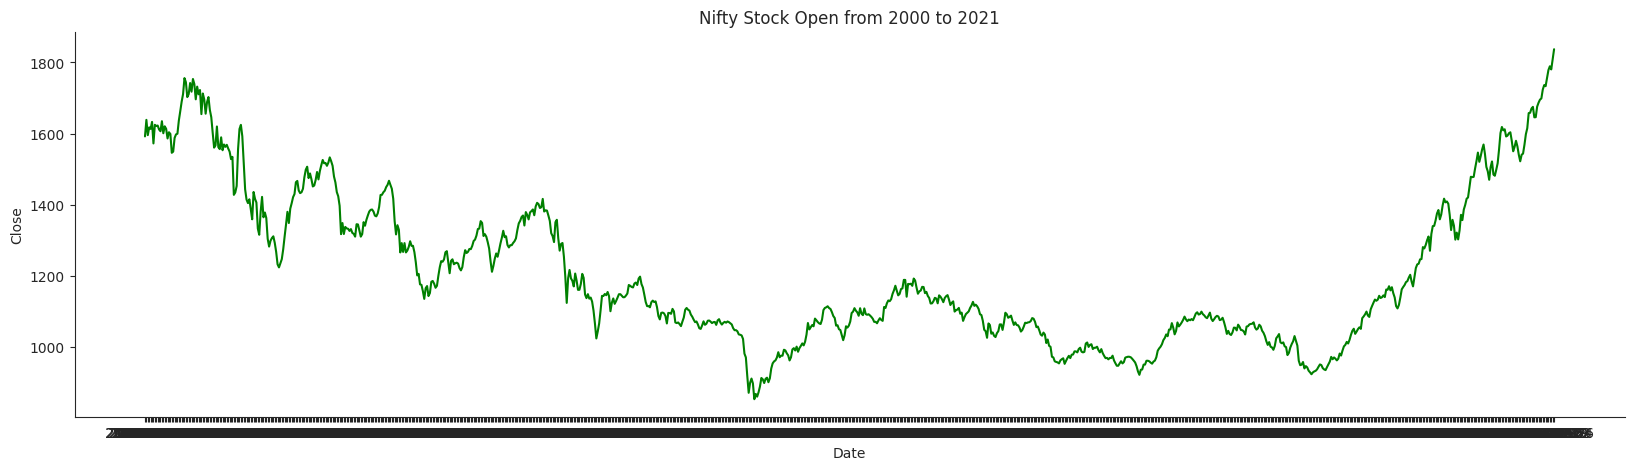

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns; sns.set
import matplotlib.pyplot as plt

nifty_50_df = pd.read_csv('nufty_data.csv')

plt.figure(figsize=(20,5))
sns.set_style("ticks")
sns.lineplot(data=nifty_50_df[:1000], x="Date", y='Close', color='Green')
sns.despine()
plt.title("Nifty Stock Open from 2000 to 2021")

*Nifty  Open Price visualization*

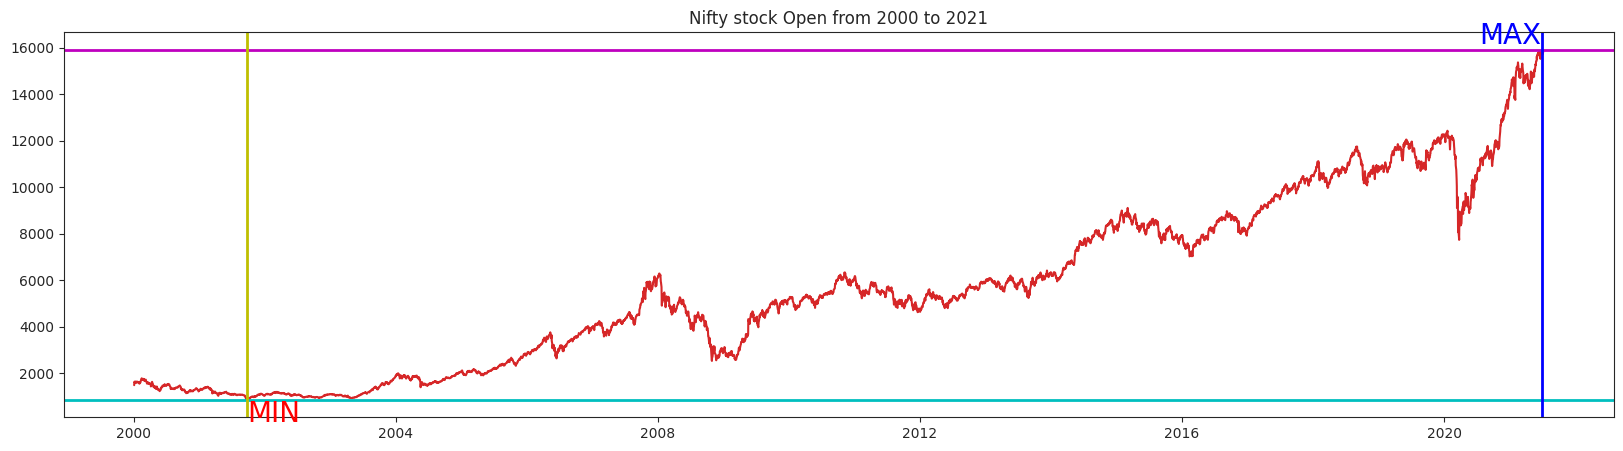

Max Value :   15915.35
Min Value :   853.0


In [ ]:
plot_attribute(nifty_bank_df,"Open",color='red')

*Nifty  high price visualization*

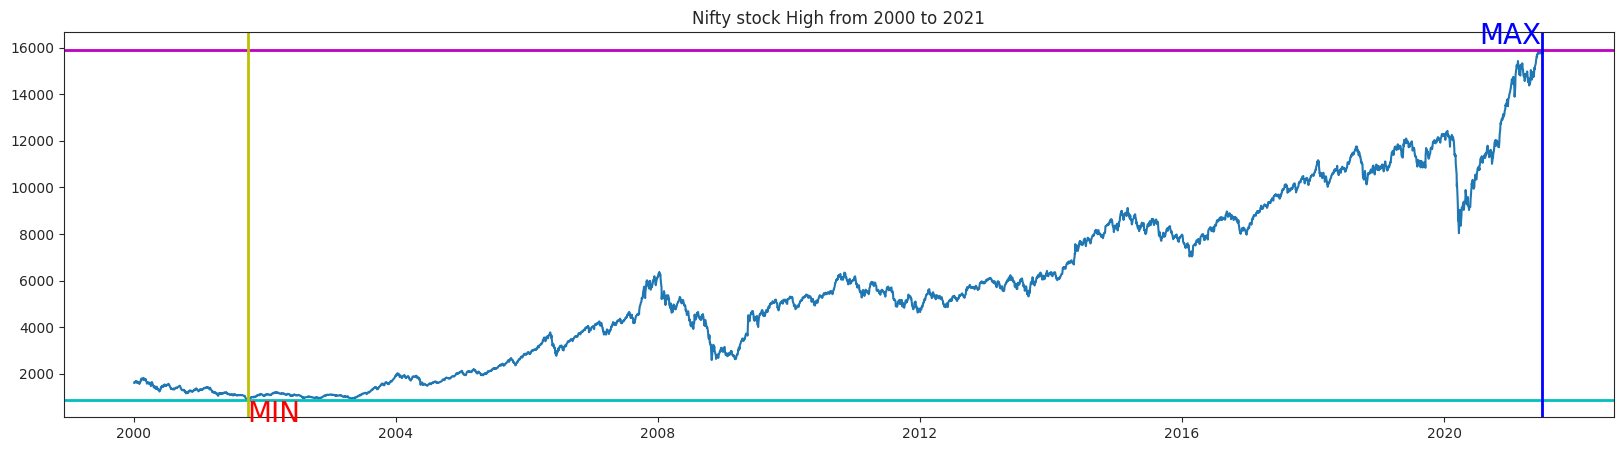

Max Value :   15915.65
Min Value :   877.0


In [ ]:
plot_attribute(nifty_bank_df,"High",color='blue')

*Nifty  low price visualization*

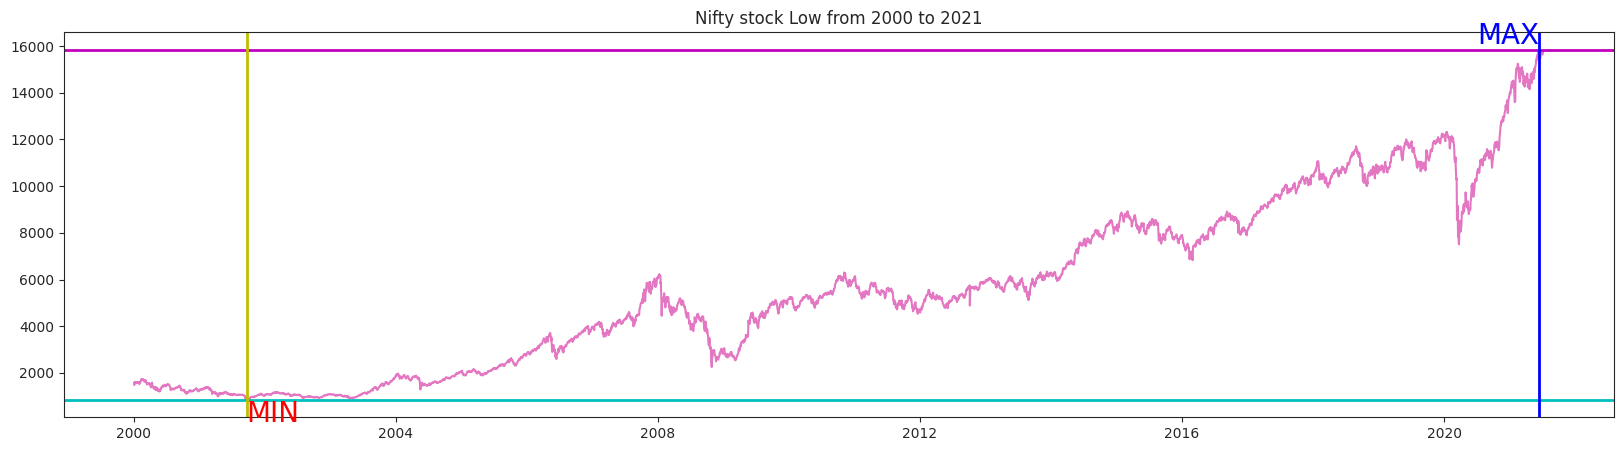

Max Value :   15842.4
Min Value :   849.95


In [ ]:
plot_attribute(nifty_bank_df,"Low",color='Pink')

*Combined Time Series Plot*

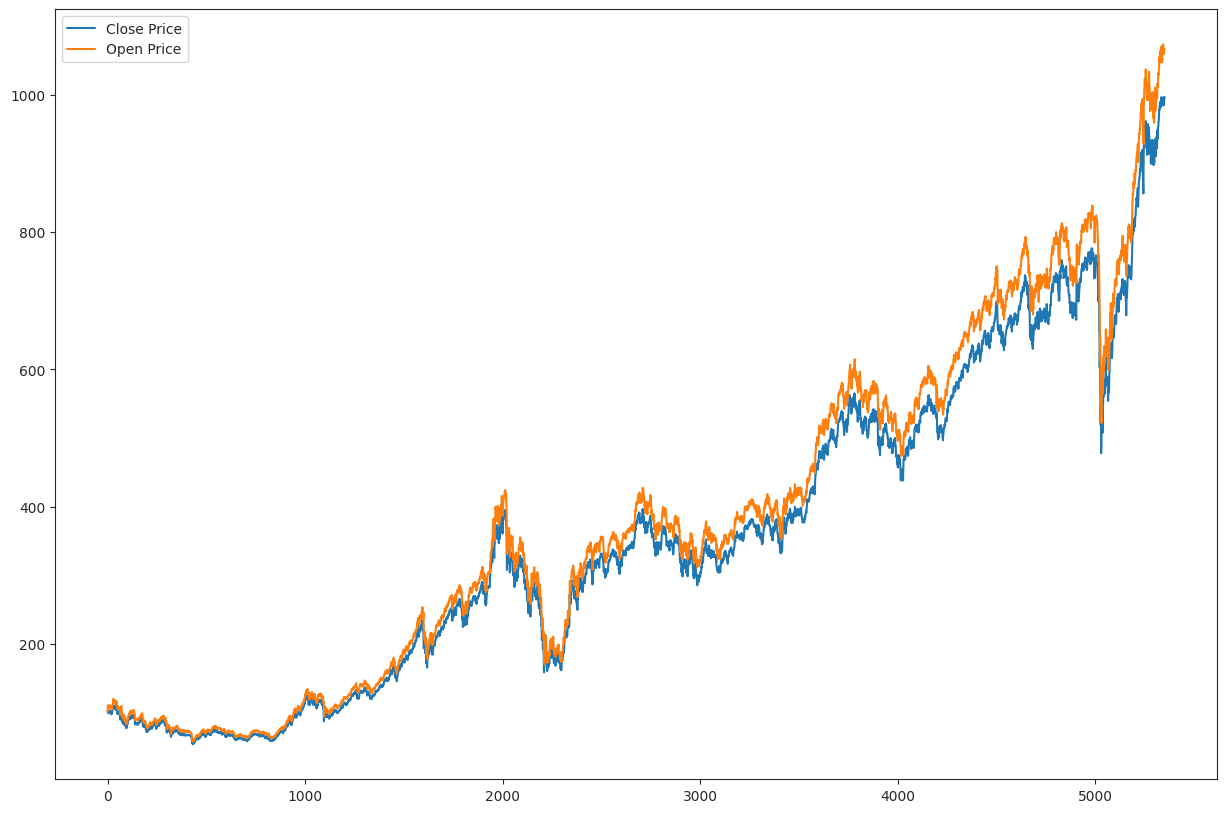

In [ ]:
normalised_close_price = nifty_50_df["Close"].div(nifty_50_df["Close"].iloc[0]).mul(100)
normalised_open_price = nifty_50_df["Open"].div(nifty_50_df['Open'].iloc[0]).mul(100)
normalised_close_price.plot()
normalised_open_price.plot()
plt.legend(['Close Price','Open Price'])
plt.show()

*Model Testing and Training*

In [ ]:
def fixer(s):
  ctx = s.split("-")
  new_s = s + '-01'*(3-len(ctx))+' 00:00:00.00'
  return new_s

fixer('1')

'1-01-01 00:00:00.00'

In [ ]:
from datetime import datetime

def partial_date_str_to_int(date_str):
    try:
        # Attempt to parse the input string as a date
        date_obj = datetime.strptime(date_str+' 00:00:00.00', "%Y-%m-%d %H:%M:%S.%f")
    except ValueError:
        # If parsing fails, assume it's a partial date and fill missing values with 1
        date_obj = datetime.strptime(fixer(date_str) , "%Y-%m-%d %H:%M:%S.%f")


    # Convert to integer (timestamp)
    date_int = int(date_obj.timestamp())
    return int(date_obj.strftime("%Y%m%d%H%M%S")+'00000')

# Examples
print(partial_date_str_to_int("2022"))
print(partial_date_str_to_int("2022-03"))
len('00000000000')

2022010100000000000
2022030100000000000


11

In [ ]:
nifty_50_df = pd.read_csv('nufty_data.csv')
nifty_50_df['Date'] = pd.to_datetime(nifty_50_df['Date'])
nifty_50_df.set_index('Date', inplace=True)
train_data = nifty_50_df["Close"]["2018":"4-15-2020"]
test_data =  nifty_50_df["Close"]["4-15-2020":]

In [ ]:
nifty_50_df

,Open,High,Low,Close,Volume,Turnover,P/E,P/B,Div Yield
Date,,,,,,,,,
2000-01-03,1482.15,1592.90,1482.15,1592.20,25358322,8.841500e+09,25.91,4.63,0.95
2000-01-04,1594.40,1641.95,1594.40,1638.70,38787872,1.973690e+10,26.67,4.76,0.92
2000-01-05,1634.55,1635.50,1555.05,1595.80,62153431,3.084790e+10,25.97,4.64,0.95
2000-01-06,1595.80,1639.00,1595.80,1617.60,51272875,2.531180e+10,26.32,4.70,0.94
2000-01-07,1616.60,1628.25,1597.20,1613.30,54315945,1.914630e+10,26.25,4.69,0.94
...,...,...,...,...,...,...,...,...,...
2021-07-01,15755.05,15755.55,15667.05,15680.00,224921644,1.735997e+11,28.26,4.23,1.27
2021-07-02,15705.85,15738.35,15635.95,15722.20,254808999,1.801542e+11,28.33,4.24,1.23
2021-07-05,15793.40,15845.95,15762.05,15834.35,207032153,1.497654e+11,28.53,4.27,1.23


In [ ]:
test_data

Date
2020-04-15     8925.30
2020-04-16     8992.80
2020-04-17     9266.75
2020-04-20     9261.85
2020-04-21     8981.45
                ...   
2021-07-01    15680.00
2021-07-02    15722.20
2021-07-05    15834.35
2021-07-06    15818.25
2021-07-07    15879.65
Name: Close, Length: 309, dtype: float64

*AIC and BIC model Criterion*

*SARIMAX LIBRARIES*

In [ ]:
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error

In [ ]:
test_data = test_data.squeeze()
test_data

Date
2020-04-15     8925.30
2020-04-16     8992.80
2020-04-17     9266.75
2020-04-20     9261.85
2020-04-21     8981.45
                ...   
2021-07-01    15680.00
2021-07-02    15722.20
2021-07-05    15834.35
2021-07-06    15818.25
2021-07-07    15879.65
Name: Close, Length: 309, dtype: float64

*SARIMAX model*

In [ ]:
model = SARIMAX(train_data.squeeze(), order=(5,1,2))
results = model.fit()

In [ ]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA

df = pd.read_csv('nufty_data.csv')

p = d = q = range(0, 5)

aic_bic = pd.DataFrame(columns=['p','d','q','AIC','BIC'])
order = (p, d, q)

aic_bic_row = [order[0],order[1],order[2],results.aic,results.bic]

aic_bic.loc[len(aic_bic)] = aic_bic_row

aic_bic.sort_values('AIC')[:5]

,p,d,q,AIC,BIC
0,"(0, 1, 2, 3, 4)","(0, 1, 2, 3, 4)","(0, 1, 2, 3, 4)",7026.688218,7061.325986


In [ ]:
mae = np.mean(np.abs(results.resid))

print(mae)

102.14464589527769


*SARIMA MODEL DIAGNOSTICS*

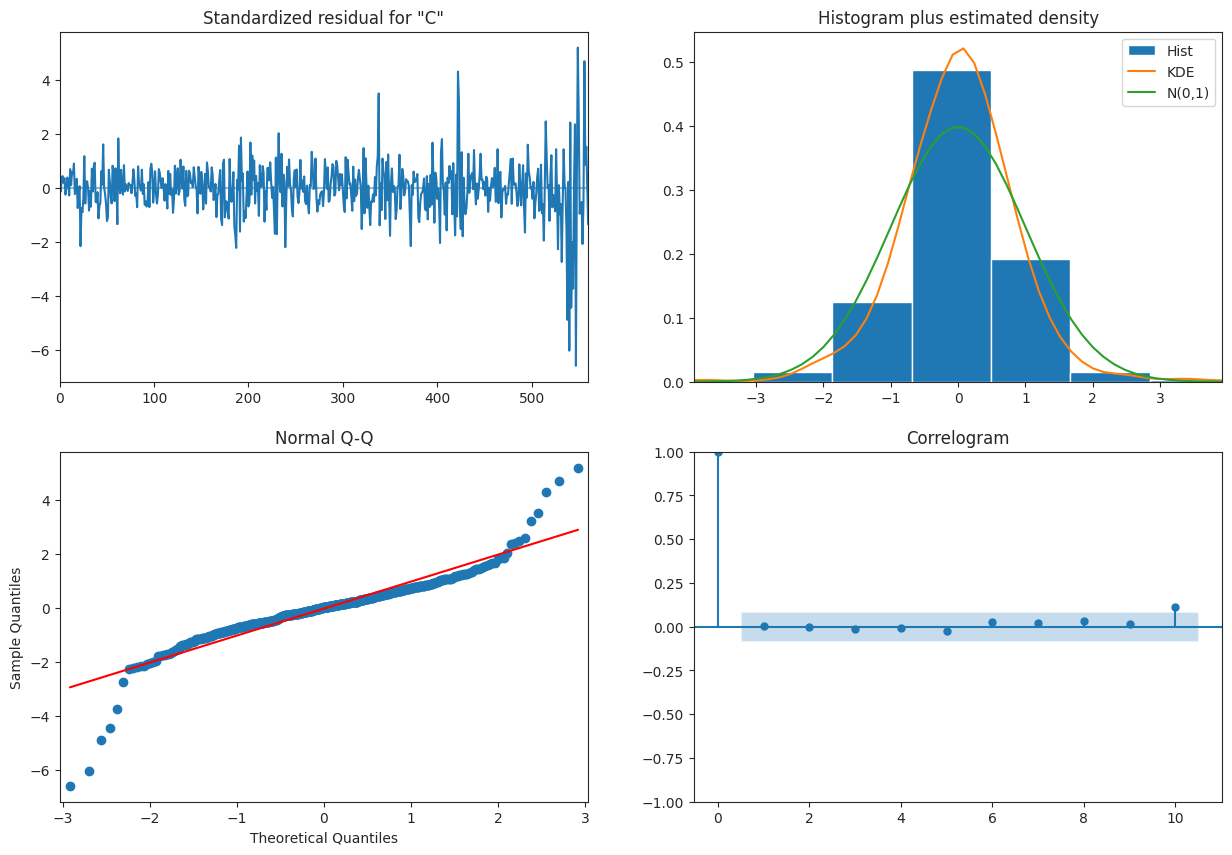

In [ ]:
plt.rcParams["figure.figsize"] = (15,10)
results.plot_diagnostics()
plt.show()

***Accuracy of the SARIMA Model***

Accuracy is: 1.0


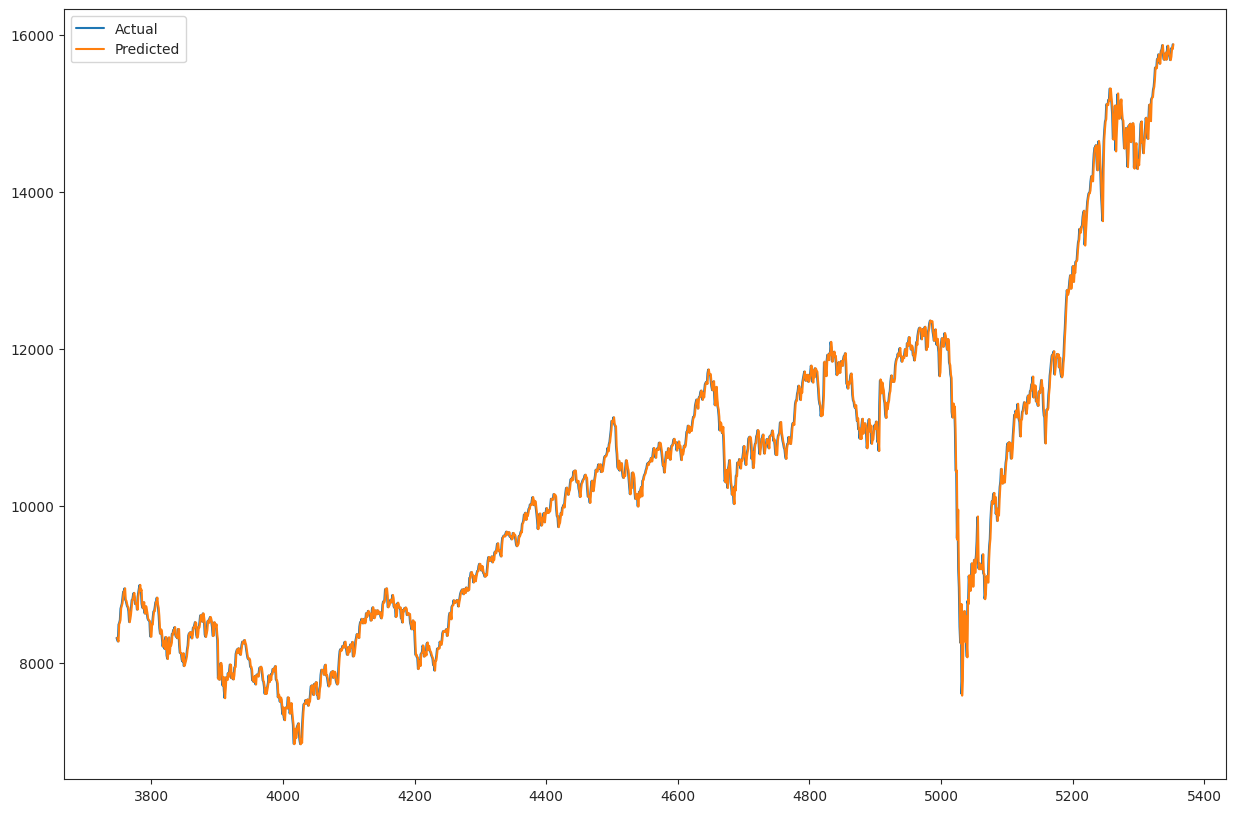

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Load dataset
df = pd.read_csv('nufty_data.csv')

# Define data
y = df['Close']
X = df[['Volume']]

# Split into train and test
y_train, y_test = train_test_split(y, test_size=0.3, shuffle=False)
X_train, X_test = train_test_split(X, test_size=0.3, shuffle=False)

# Build SARIMAX model
model = SARIMAX(y, order=(2,1,1))
fitted = model.fit()

# Forecast on test data
y_pred = fitted.predict(len(X_train)+1, len(X_train)+len(X_test), exog=X_test)

cutoff = 0.7
y_pred_classes = np.zeros_like(y_pred)
y_test_classes = np.zeros_like(y_pred)

accuracy = accuracy_score(y_test_classes, y_pred_classes)
print('Accuracy is:', accuracy)

# Plot actual and predicted
plt.plot(y_test, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.legend()
plt.show()

In [ ]:
res = pd.DataFrame()
res.insert(0,'ACTUAL', list(y_test))
res.insert(1, 'SARIMA PRED', list(y_pred))

In [ ]:
res

,ACTUAL,SARIMA PRED
0,8323.00,8324.478355
1,8299.40,8299.236289
2,8277.55,8276.747352
3,8494.15,8499.243205
4,8513.80,8516.670271
...,...,...
1601,15680.00,15678.691158
1602,15722.20,15722.785385
1603,15834.35,15837.580009
1604,15818.25,15819.082155


*Linear Regression*

**Importing Libraries**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

**Defining Target and Label**

In [ ]:
X = nifty_50_df[['Open', 'High', 'Low', 'Volume']]
y = nifty_50_df['Close']

**Splitting the Dataset**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

**Linear Regression Model**

In [ ]:
model = LinearRegression()

In [ ]:
model.fit(X,y)

predictions = model.predict(X_test)
llt = model.predict(X_test)

**Mean Squared Error (MSE) Value**

In [ ]:
mse = metrics.mean_squared_error(y_test, predictions)
print('MSE:', mse)

MSE: 697.7471574569134


**Root Mean Sqaure Error Value**

In [ ]:
rmse = np.sqrt(metrics.mean_squared_error(y_test, predictions))
print('RMSE:', rmse)

RMSE: 26.41490407813198


R-Squared Value


In [ ]:
r2 = metrics.r2_score(y_test, predictions)
print('R-squared:', r2)

R-squared: 0.9999491687602067


Coeffients

In [ ]:
print('Coefficients:', model.coef_)

Coefficients: [-6.11126868e-01  9.01937973e-01  7.09513451e-01 -1.00347872e-08]


**Prediction**

In [ ]:
predictions = model.predict(X_test)
mse = metrics.mean_squared_error(y_test, predictions)
mae = metrics.mean_absolute_error(y_test, predictions)

In [ ]:
print('MSE:', mse)
print('MAE:', mae)
print('Coefficients:', model.coef_)

MSE: 697.7471574569134
MAE: 16.264059072508147
Coefficients: [-6.11126868e-01  9.01937973e-01  7.09513451e-01 -1.00347872e-08]


*Visualisation of Linear Regression*

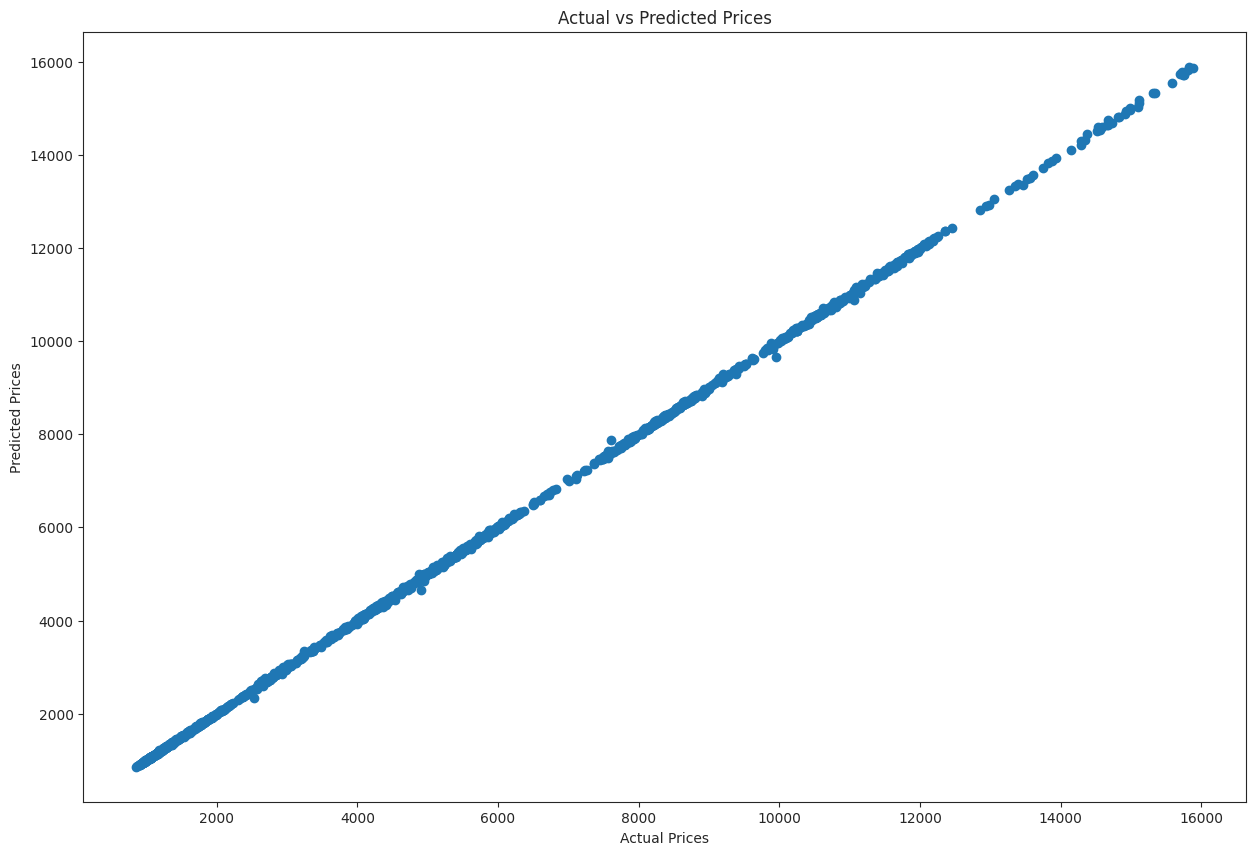

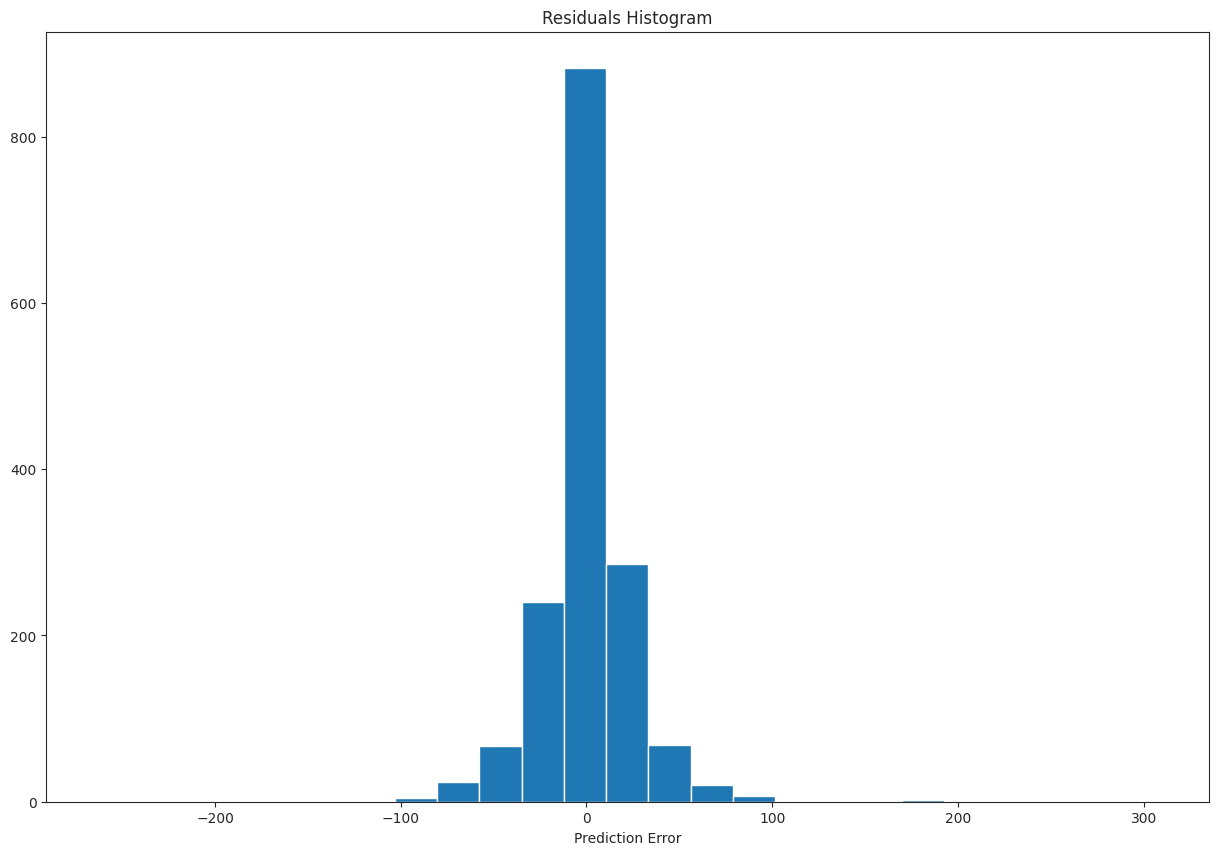

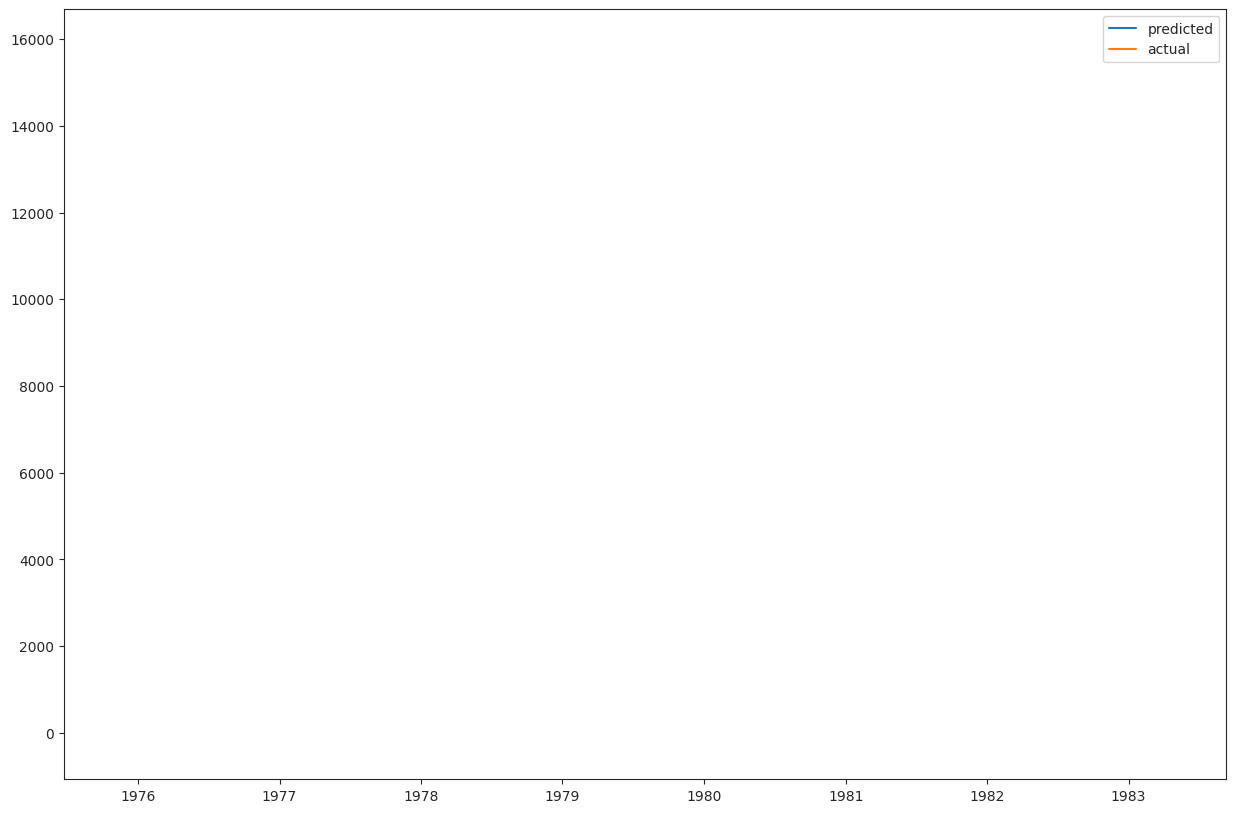

In [ ]:
plt.scatter(y_test, predictions)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title("Actual vs Predicted Prices")
plt.show()

residuals = y_test - predictions
plt.hist(residuals, bins = 25)
plt.xlabel('Prediction Error')
plt.title("Residuals Histogram")
plt.show()
predf = pd.DataFrame(predictions)
plt.plot(residuals, label="predicted")
plt.plot(y_test, label="actual")
plt.legend()
plt.xlim(2000, 5000)
plt.show()

***Accuracy of Linear Regression***

In [ ]:
import pandas as pd
import numpy as np
from numpy import mean
from numpy import std
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

# Load the dataset
df = pd.read_csv('nufty_data.csv')

# Define X and y
X = df[['Open','High','Low','Volume']]
y = df['Close']

X, y = make_classification(n_samples=5000, n_features=20, n_informative=15, n_redundant=5, random_state=3)

model = RandomForestClassifier()

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
accuracy = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
print('Accuracy: %.3f (%.3f)' %(mean(accuracy), std(accuracy)))

Accuracy: 0.948 (0.009)


In [ ]:
res.insert(2, 'LINEAR REG PRED', llt)

*Random Forest*

MSE: 228.7971844190808
RMSE: 15.126043250601949
R-squared: 0.9999833320072737
Feature Importances:
 [2.36382669e-02 6.38766017e-01 3.37582862e-01 1.28544289e-05]
Mean Absolute Error: 8.61


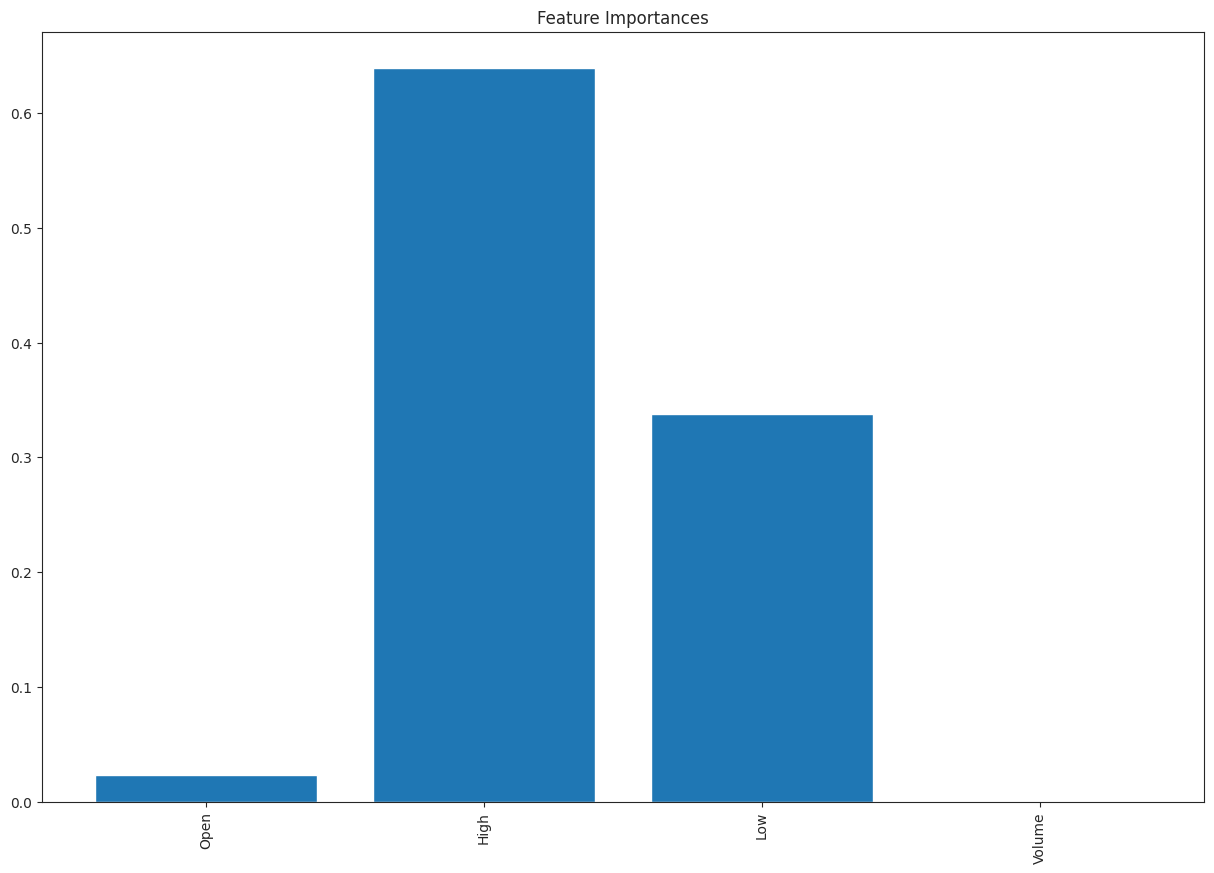

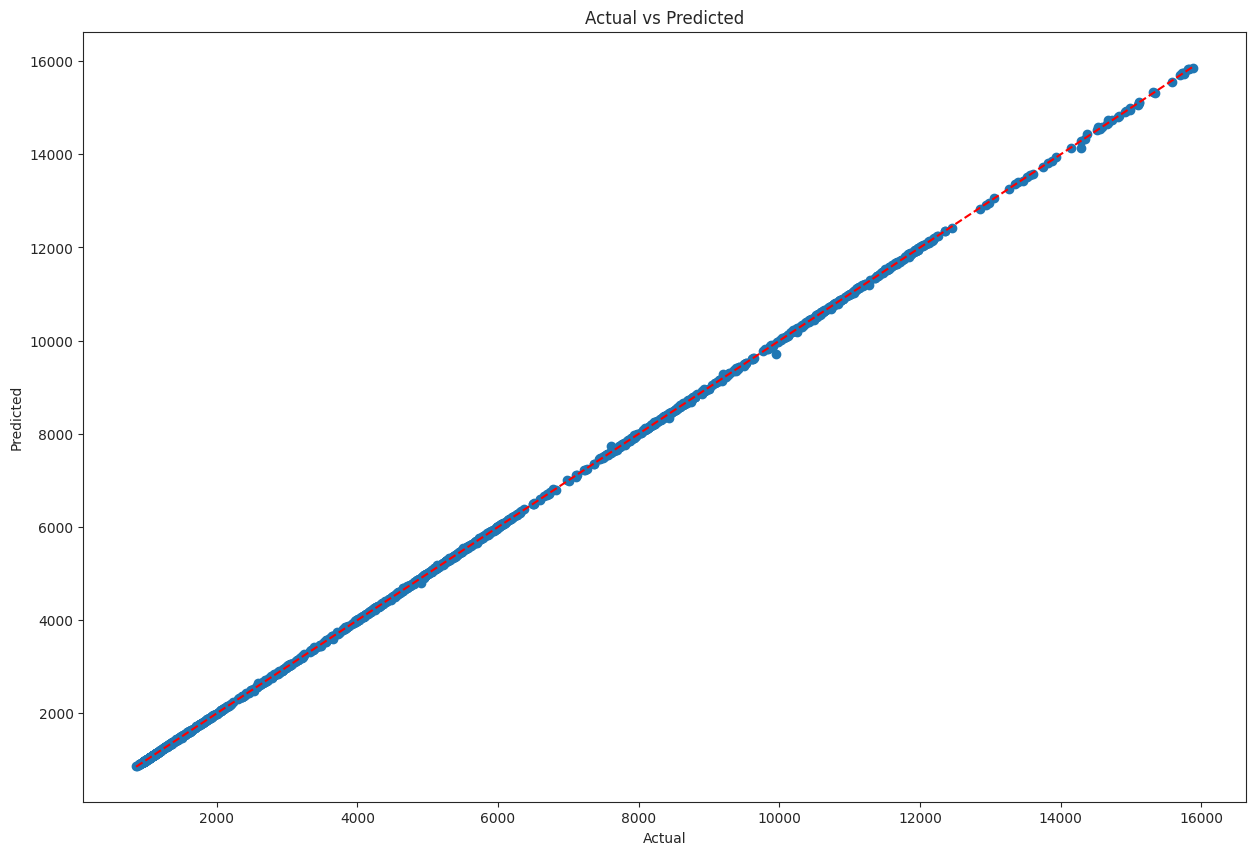

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score


nifty_50_df = pd.read_csv('nufty_data.csv')

X = nifty_50_df[['Open', 'High', 'Low', 'Volume']]
y = nifty_50_df['Close']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

rf_model = RandomForestRegressor(n_estimators=1000, random_state=42)

rf_model.fit(X,y)

predictions = rf_model.predict(X_test)

mse = metrics.mean_squared_error(y_test, predictions)
print("MSE:", mse)

rmse = np.sqrt(metrics.mean_squared_error(y_test, predictions))
print("RMSE:", rmse)

r2 = metrics.r2_score(y_test, predictions)
print("R-squared:", r2)

print("Feature Importances:\n", rf_model.feature_importances_)

predictions = rf_model.predict(X_test)
p1 = rf_model.predict(X_test)
res.insert(3, 'Random Forest', p1)
errors = abs(predictions - y_test)
print('Mean Absolute Error:', round(np.mean(errors), 2))


importances = rf_model.feature_importances_
features = X.columns
plt.bar(range(len(features)), importances)
plt.xticks(range(len(features)), features, rotation='vertical')
plt.title("Feature Importances")
plt.show()

plt.scatter(y_test, predictions)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title("Actual vs Predicted")
plt.show()

***Accuracy of Random Forest***

In [ ]:
import pandas as pd
import numpy as np
from numpy import mean
from numpy import std
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

# Load the dataset
df = pd.read_csv('nufty_data.csv')

# Define X and y
X = df[['Open','High','Low','Volume']]
y = df['Close']

X, y = make_classification(n_samples=5000, n_features=20, n_informative=15, n_redundant=5, random_state=3)

model = RandomForestClassifier()

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
print('Accuracy: %.3f (%.3f)' %(mean(n_scores), std(n_scores)))


Accuracy: 0.947 (0.009)


In [ ]:
res

,ACTUAL,SARIMA PRED,LINEAR REG PRED,Random Forest
0,8323.00,8324.478355,12090.069475,12105.11660
1,8299.40,8299.236289,3156.764131,3148.96895
2,8277.55,8276.747352,1071.288686,1073.27710
3,8494.15,8499.243205,8180.322751,8187.33400
4,8513.80,8516.670271,3476.693830,3472.76290
...,...,...,...,...
1601,15680.00,15678.691158,7554.213976,7568.12435
1602,15722.20,15722.785385,10827.412433,10846.97330
1603,15834.35,15837.580009,3690.410388,3706.09245
1604,15818.25,15819.082155,11899.570466,11887.21760
